# Explainable Analysis

## This notebook runs in environment shap.
## Do remember 'conda activate shap' before running code cells.

In [1]:
import os, cv2
from tqdm import tqdm
import numpy as np
def load_images_and_labels(directory):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        print(f'loading images from {class_dir}')
        for filename in tqdm(os.listdir(class_dir)):
            image_path = os.path.join(class_dir, filename)
            try:
                image = cv2.imread(image_path)
                #image = tf.cast(image, tf.float16) / 255.0 # normalize, out of memeory
                #image = cv2.resize(image, image_size)
                images.append(image)
                labels.append(class_names.index(class_name))
            except Exception as e:
                print(f"Error loading image: {image_path}")
                print(f"Error message: {e}")
    return np.array(images), np.array(labels)
images, labels = load_images_and_labels("./data/merged_aug_data_224")

loading images from ./data/merged_aug_data_224\Mild


100%|███████████████████████████████████████████████████████████████████████████| 11200/11200 [00:11<00:00, 991.44it/s]


loading images from ./data/merged_aug_data_224\Moderate


100%|███████████████████████████████████████████████████████████████████████████| 16372/16372 [00:25<00:00, 650.76it/s]


loading images from ./data/merged_aug_data_224\Non


100%|███████████████████████████████████████████████████████████████████████████| 12800/12800 [00:22<00:00, 571.69it/s]


In [2]:
print(images[0].shape)

(224, 224, 3)


In [6]:
import shap
import tensorflow as tf
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# load the best performed model
model_path = './models/MobileNet3/final_best_model.h5'
model = tf.keras.models.load_model(model_path)

#explainer = shap.Explainer(model, max_evals = 301057)
#explainer = shap.explainers.Permutation(model, max_evals = 301057)
#shap_values = explainer(images)

test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=2023)
for train_index_, test_index in test_split.split(images, labels):
    train_images, test_images = images[train_index_], images[test_index]
    train_labels, test_labels = labels[train_index_], labels[test_index]
    

    
masker = shap.maskers.Image("inpaint_telea", test_images[0].shape)
# Create an explainer
explainer = shap.Explainer(model, masker, output_names=["Mild","Moderate","Non"], silent=True)

True label: Mild



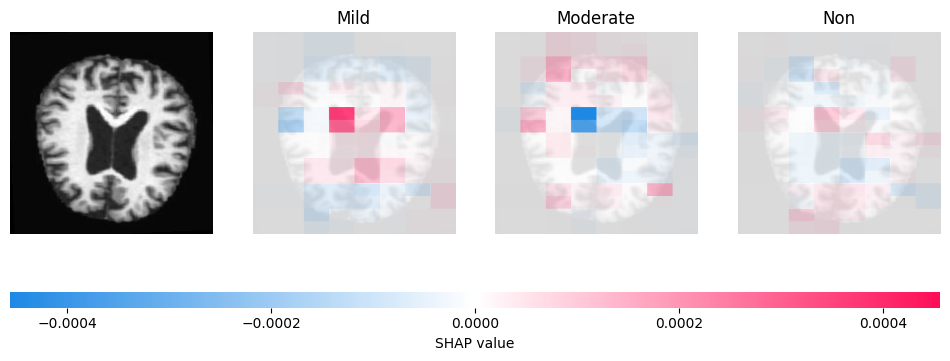

True label: Moerate



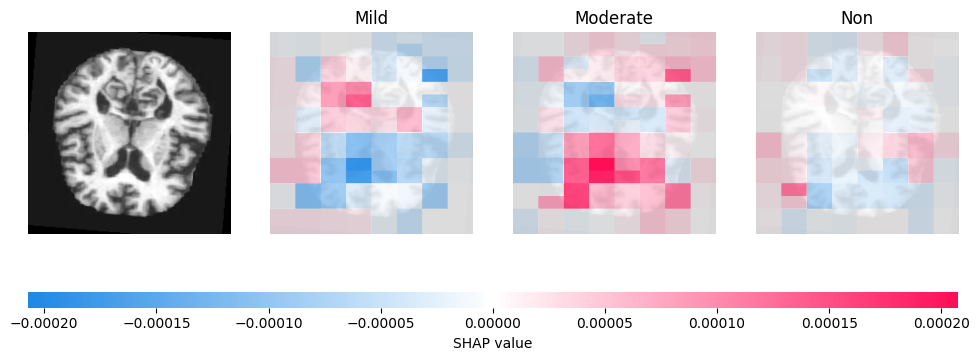

True label: Non



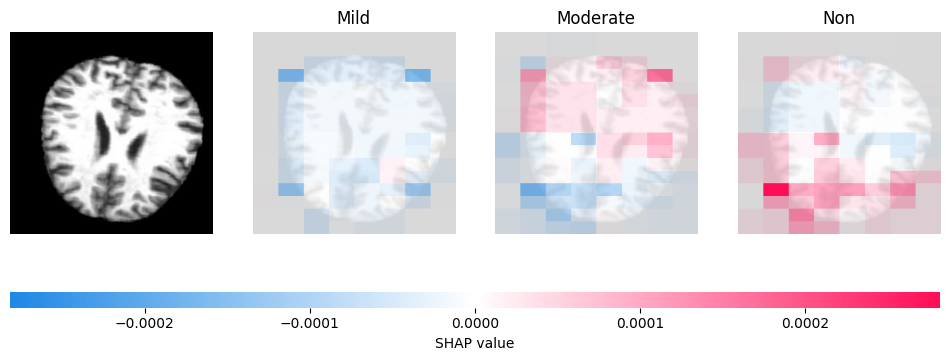

In [11]:
shap_values = explainer(test_images[0:3])
#print(shap_values.shape)
#print(shap_values)
for i in range(shap_values.shape[0]):
    if test_labels[i] == 0:
        print('True label: Mild\n')
    elif test_labels[i] == 1:
        print('True label: Moerate\n')
    else:
        print('True label: Non\n')
    shap.image_plot(shap_values[i])